In [ ]:
# In this project, you are expected to build a profile of the customers most likely to default using technique
# such as univariate and bivariate analysis. With this analysis, we will be able to understand the factors or
# characteristics of a customer who is likely to default. This profile will act as a criterion for the bank or lending 
# facility to detect potential defaulters and take appropriate actions in a timely manner.



In [2]:
#load CSV using pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
filename = 'defaultC.csv'
filepath = 'C:/Users/User/Documents/Workspace/'
data = pd.read_csv(filepath + filename)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [23]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [24]:
educLevels = sorted(data.EDUCATION.unique())

In [25]:
educLevels

[0, 1, 2, 3, 4, 5, 6]

In [26]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [27]:
# extract all rows where education is 0, 5 or 6

In [28]:
data_subset = data.loc[data['EDUCATION']==0]=4

In [29]:
data_subset

4

In [30]:
subset = (data.EDUCATION==0)|(data.EDUCATION==5)|(data.EDUCATION==6)

In [31]:
subset

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: EDUCATION, Length: 30000, dtype: bool

In [32]:
data.loc[subset,'EDUCATION']=4

In [33]:
sorted(data.EDUCATION.unique())

[1, 2, 3, 4]

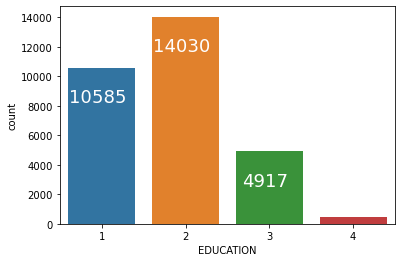

In [34]:
ax = sns.countplot(x='EDUCATION',data = data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [35]:
data.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

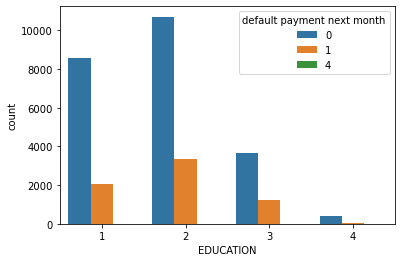

In [36]:
sns.countplot(x='EDUCATION',hue='default payment next month',data = data)

In [ ]:
# The chat above shows that University students are more likely to default more followed by graduate school.

In [37]:
AgeLevels = sorted(data.AGE.unique())

In [38]:
AgeLevels

[4,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 79]

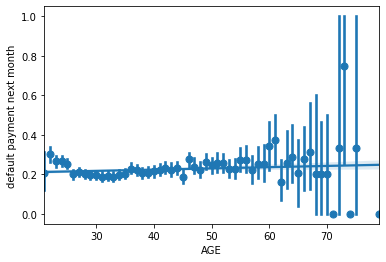

In [81]:
#sns.regplot(x=data['AGE'],y=data['default payment next month'])
sns.regplot(x='AGE', y='default payment next month', data=data,
           x_estimator=np.mean);

In [ ]:
#The age chat above shows that those within the age of 25-50  years are more likely to default.

In [40]:
MarriageLevels = sorted(data.MARRIAGE.unique())

In [41]:
MarriageLevels

[0, 1, 2, 3, 4]

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

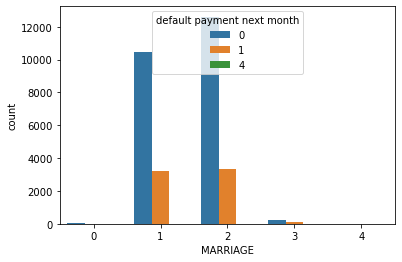

In [42]:
sns.countplot(x='MARRIAGE',hue='default payment next month',data = data)

In [ ]:
# For marriage, No 1= married, no 2= Single, 3= Others. The chat above shows that, the level of defaulter among the
# Single and Married is minimal compare to the level of defaulters in others.

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

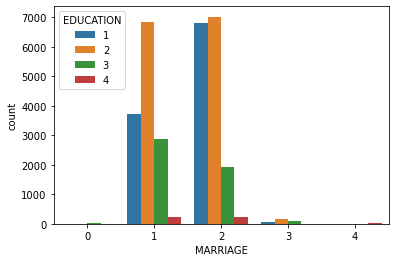

In [43]:
sns.countplot(x='MARRIAGE',hue='EDUCATION',data = data)

In [44]:
data.columns.T

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

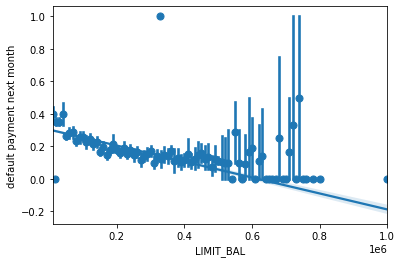

In [5]:
sns.regplot(x='LIMIT_BAL', y='default payment next month', data=data,
           x_estimator=np.mean);

In [ ]:
# The chat above shows that there is a negative correlation between default payment and Limited balance. 

<AxesSubplot:xlabel='SEX', ylabel='count'>

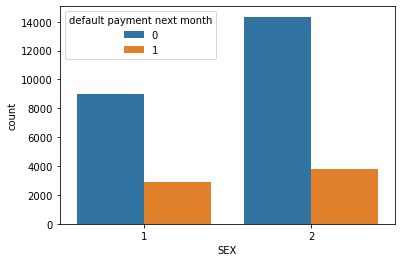

In [83]:
sns.countplot(x='SEX',hue='default payment next month',data = data)

In [ ]:
# The chat above shows that the male which is no 1 and Female which is no 2, level of defaulters is not significant.

In [48]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [49]:
#Comparing Amount of Previous Payment and Amount of Bill Statement

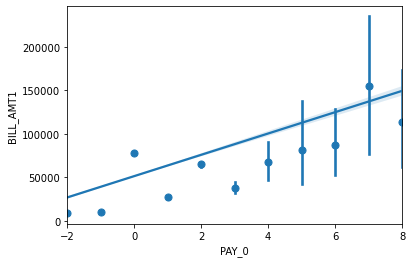

In [84]:
sns.regplot(x='PAY_0', y='BILL_AMT1', data=data,
           x_estimator=np.mean);

In [51]:
# In comparing the payment status in september was about 2,500 in 2005 while the amount of bill statement in 
# september increased by 8.

<AxesSubplot:xlabel='PAY_2', ylabel='BILL_AMT2'>

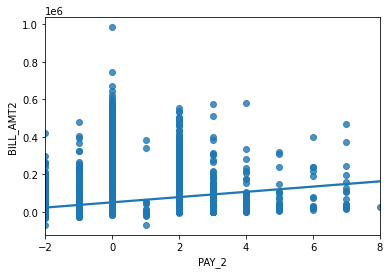

In [85]:
sns.regplot(x=data['PAY_2'], y=data['BILL_AMT2'])

In [ ]:
# In the chat above, it shows that there's a positive correlation between Bill ATM2 and Payment Status in August 2005.

<AxesSubplot:xlabel='PAY_3', ylabel='BILL_AMT3'>

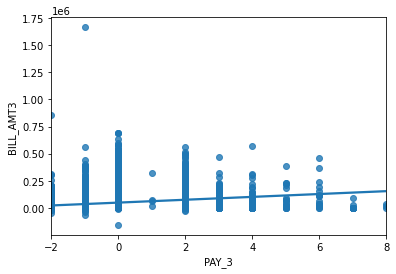

In [86]:
sns.regplot(x=data['PAY_3'], y=data['BILL_AMT3'])

In [ ]:
# For July 2005, it shows that Amount of bill statement was 0,the amount of previous payment was a little above 8.

<AxesSubplot:xlabel='PAY_4', ylabel='BILL_AMT4'>

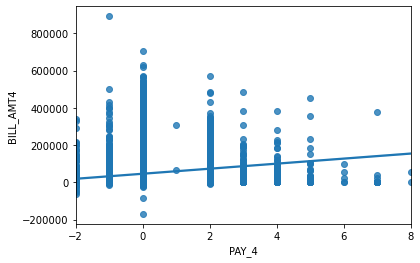

In [87]:
sns.regplot(x=data['PAY_4'], y=data['BILL_AMT4'])

In [ ]:
# For the Bill-Atm 4 and pay_4 it shows that there is a slight positive correlation.

<AxesSubplot:xlabel='PAY_5', ylabel='BILL_AMT5'>

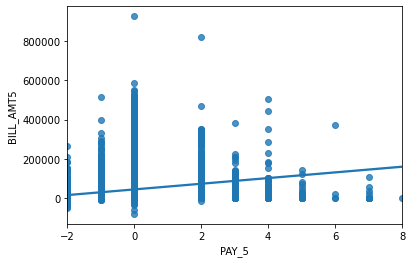

In [88]:
sns.regplot(x=data['PAY_5'], y=data['BILL_AMT5'])

In [ ]:
# For the Bill-Atm 5 and pay_5 it shows that there is a slight positive correlation.

<AxesSubplot:xlabel='PAY_6', ylabel='BILL_AMT6'>

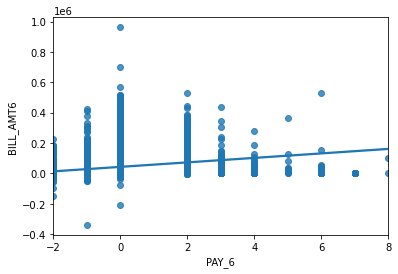

In [89]:
sns.regplot(x=data['PAY_6'], y=data['BILL_AMT6'])

In [ ]:
# The chat above shows that Bill-Atm and Pay_6 have positive relationship.

In [ ]:
# Checking the relation between Amount of Bill Statement and Amount of Previous Payment

In [90]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

<AxesSubplot:xlabel='PAY_AMT1', ylabel='BILL_AMT1'>

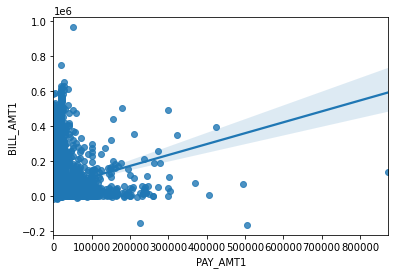

In [94]:
sns.regplot(x=data['PAY_AMT1'], y=data['BILL_AMT1'])

In [ ]:
# The above chat shows that there is a positive correlation between Amount of bill statement in 2005 and Amount of 
# previous payment.

<AxesSubplot:xlabel='PAY_AMT2', ylabel='BILL_AMT2'>

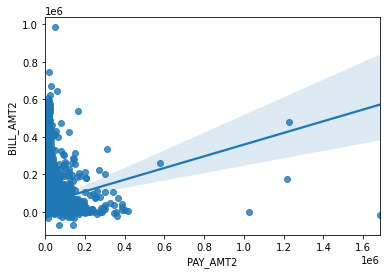

In [95]:
sns.regplot(x=data['PAY_AMT2'], y=data['BILL_AMT2'])

In [ ]:
# The above chat shows that there is a positive correlation between Amount of bill statement2 and Amount of 
# previous payment2.

<AxesSubplot:xlabel='PAY_AMT3', ylabel='BILL_AMT3'>

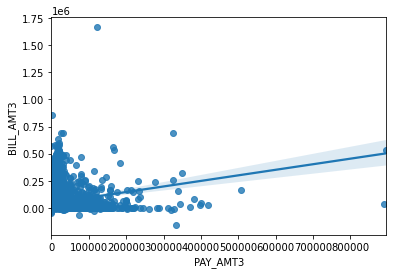

In [96]:
sns.regplot(x=data['PAY_AMT3'], y=data['BILL_AMT3'])

In [ ]:
# The above chat shows that there is a positive correlation between Amount of bill statement3 and Amount of 
# previous payment3.

<AxesSubplot:xlabel='PAY_AMT4', ylabel='BILL_AMT4'>

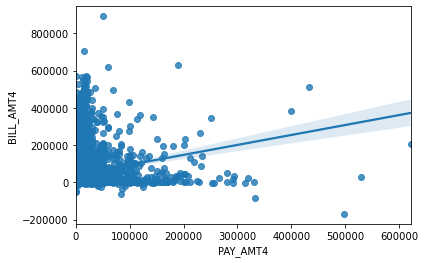

In [97]:
sns.regplot(x=data['PAY_AMT4'], y=data['BILL_AMT4'])

In [ ]:
# The above chat shows that there is a positive correlation between Amount of bill statement4 and Amount of 
# previous payment4.

<AxesSubplot:xlabel='PAY_AMT5', ylabel='BILL_AMT5'>

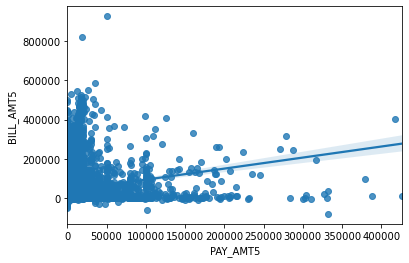

In [99]:
sns.regplot(x=data['PAY_AMT5'], y=data['BILL_AMT5'])

In [ ]:
# The above chat shows that there is a positive correlation between Amount of bill statement5 and Amount of 
# previous payment5.

<AxesSubplot:xlabel='PAY_AMT6', ylabel='BILL_AMT6'>

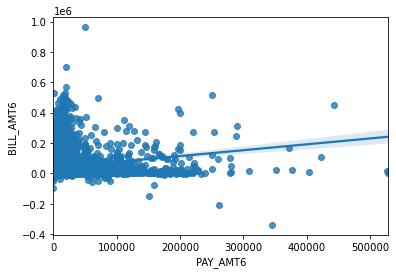

In [98]:
sns.regplot(x=data['PAY_AMT6'], y=data['BILL_AMT6'])

In [ ]:
# The above chat shows that there is a positive correlation between Amount of bill statement6 and Amount of 
# previous payment6.